# Assignment 1: Evolutionary Process Discovery
---

### 1. 🟢

(5 points) Implement the GA using deap.algorithms.eaSimple method in DEAP. Please
use [‘cxTwoPoint’, ‘mutFlipBit’, ‘selTournament’] as the [Crossover, Mutation, Selection]
operators, record the default parameter of your initial GA and plot the best fitness at
each iteration 

In [1]:
# Import Libraries
from deap import base, creator, tools, algorithms
import random
import numpy as np
import pandas as pd
import time
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the current working directory is in the python path
import sys
sys.path.append('./Assignment_1')

# Ensure Graphviz is in the path
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from support import *


In [2]:
g = np.random.randint(-1, 2)
print(g)

1


gen	nevals	avg    	std    	min	max  
0  	300   	148.353	82.8945	-10	382.1
1  	167   	219.925	66.841 	47.8	382.5
2  	191   	260.728	61.9159	66.5	399.5
3  	183   	293.237	55.7051	84.9	419.5
4  	180   	314.365	52.1866	99  	458.6
5  	189   	337.081	51.0864	128.7	458.6
6  	197   	344.564	57.6019	86.1 	458.6
7  	197   	365.981	52.7924	138.5	458.7
8  	195   	379.541	49.5705	166.3	458.7
9  	189   	389.073	51.1693	101.3	459.2
10 	185   	396.942	60.2738	81.5 	459.2
11 	167   	406.695	64.2487	126.1	459.2
12 	186   	422.141	57.8228	176.8	459.4
13 	176   	429.332	63.4848	30.1 	459.4
14 	177   	437.421	55.2979	195  	459.6
15 	176   	438.692	62.4134	50.1 	459.7
16 	191   	438.445	54.9751	169.1	459.9
17 	161   	443.437	48.8654	159.8	459.9
18 	212   	435.142	62.0421	120.2	460.1
19 	187   	435.928	63.4213	139.9	460.2
20 	185   	436.165	67.3073	50.2 	460.3
21 	171   	443.824	49.0518	140.5	460.4
22 	158   	447.999	44.2702	140.2	460.5
23 	181   	446.523	48.1209	168.3	460.7
24 	171   	446.298	47.14  	129.8	

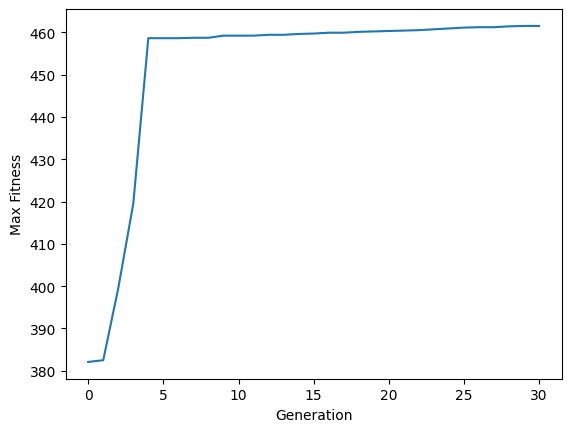

In [3]:
# Create the types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_int", np.random.randint, -1, 2)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=PLACES*TRANSITIONS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
pop = toolbox.population(n=300)

# Record the evolution
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the GA
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)

# Plot the best fitness at each iteration
gen, max_ = log.select("gen", "max")
plt.plot(gen, max_)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.show()

Then you have to investigate the performance of the GA: in task 2 and 3 that you will do,
check the distribution of the fitness values of the best solution found across 30 runs by
creating boxplots. Also, check the average best fitness(ABF) at each iteration (over 30 runs)
to verify possible premature convergence by creating line plots. The Figure 3 is an example of
multiple line plots and boxplots for reference (please notice that we have a maximization
problem here and the line plot might look different).

In [4]:
# Initialize lists to store the results
best_fitness_runs = []
best_fitness_iterations = []

# TODO: Find out what the average best fitness (ABF) is. 

# Run the GA 30 times
for _ in range(10):
    # Create the population
    pop = toolbox.population(n=300)

    # Run the GA
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)

    # Record the best fitness found in this run
    best_fitness_runs.append(hof[0].fitness.values[0])

    # Record the best fitness at each iteration
    best_fitness_iterations.append(log.select("max"))

gen	nevals	avg   	std    	min  	max
0  	300   	149.87	80.6918	-10.3	351
1  	182   	209.047	65.1916	47.8 	381.9
2  	174   	250.893	54.3963	117.6	361.4
3  	169   	281.364	59.8372	76.3 	380.2
4  	172   	308.979	53.362 	80.6 	439.4
5  	159   	323.782	57.2638	66.3 	439.4
6  	174   	340.205	55.4576	65.8 	439.4
7  	190   	351.313	61.4866	80.8 	439.4
8  	198   	363.961	69.6767	30.6 	439.9
9  	164   	385.056	60.9025	105.9	477.1
10 	170   	399.413	55.1938	161.3	477.1
11 	172   	412.799	51.8437	124  	513  
12 	178   	417.489	56.0933	68.2 	513  
13 	190   	416.813	62.4821	125.6	474.4
14 	183   	419.323	62.5425	118  	474.4
15 	195   	425.152	56.2172	121.4	474.4
16 	172   	430.285	57.2554	121.4	474.3
17 	173   	434.747	56.2033	99.1 	474.7
18 	191   	436.39 	61.5737	86   	474.4
19 	176   	437.142	62.0826	81.4 	474.4
20 	175   	433.4  	70.1692	72.1 	474.4
21 	163   	437.077	63.9928	72.8 	474.5
22 	199   	429.049	75.1243	100.2	476.6
23 	177   	431.673	77.314 	81.5 	476.6
24 	194   	437.113	75.9209	119.

31
10


<Axes: >

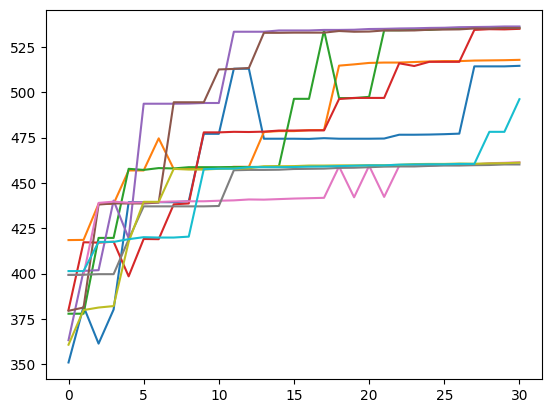

In [5]:
print(len(best_fitness_iterations[0]))
print(len(best_fitness_runs))
# print(best_fitness_runs)
pd.DataFrame(best_fitness_iterations).T.plot(legend=False)

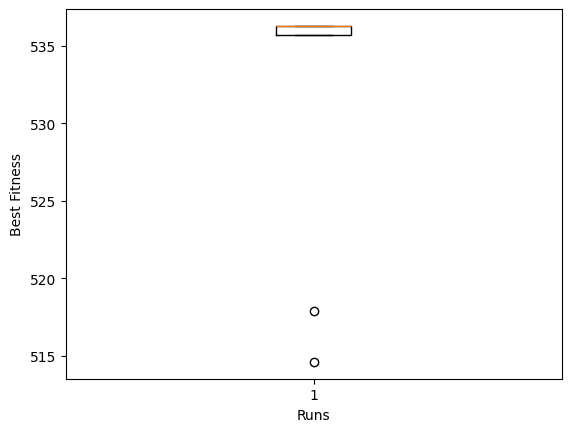

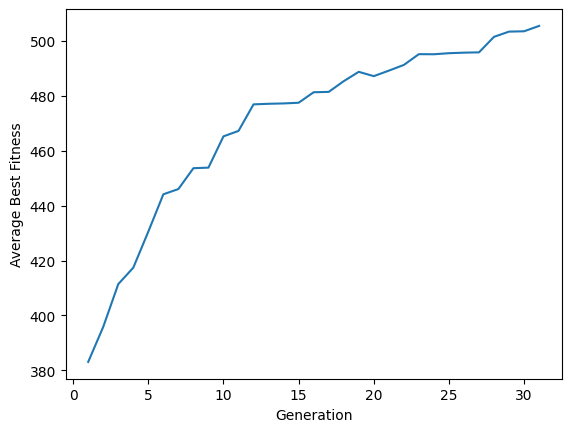

In [6]:

# Create a boxplot of the best fitness found in each run
plt.boxplot(best_fitness_runs)
plt.xlabel("Runs")
plt.ylabel("Best Fitness")
plt.show()

# Create a line plot of the average best fitness at each iteration
avg_best_fitness_iterations = np.mean(best_fitness_iterations, axis=0)
plt.plot(range(1, 32), avg_best_fitness_iterations)
plt.xlabel("Generation")
plt.ylabel("Average Best Fitness")
plt.show()

### 2. 🟢

(5 points) compare the performance of possible variants of your GA, e.g., using
different crossover, mutation, and selection operators. Test the variants in the table
below, and investigate both the impact to the optimization performances and the
overall running time, keep the best choice according to ABF for the later questions.
You can refer to the operators described in DEAP documentation: 

In [7]:
# Define the combinations of operators
combinations = [
    ("cxTwoPoint", "mutFlipBit", "selTournament"),
    ("cxTwoPoint", "mutFlipBit", "selRoulette"),
    ("cxTwoPoint", "mutShuffleIndexes", "selTournament"),
    ("cxTwoPoint", "mutShuffleIndexes", "selRoulette"),
    ("cxOrdered", "mutFlipBit", "selTournament"),
    ("cxOrdered", "mutFlipBit", "selRoulette"),
    ("cxOrdered", "mutShuffleIndexes", "selTournament"),
    ("cxOrdered", "mutShuffleIndexes", "selRoulette"),
]

# Initialize a list to store the results
results = []

# For each combination of operators
for cx, mut, sel in combinations:
    # Register the operators in the toolbox
    toolbox.register("mate", getattr(tools, cx))
    toolbox.register("mutate", getattr(tools, mut), indpb=0.05)
    if sel == "selTournament":
        toolbox.register("select", getattr(tools, sel), tournsize=3)
    else:
        toolbox.register("select", getattr(tools, sel))

    # Initialize lists to store the best fitness found in each run and at each iteration
    best_fitness_runs = []
    best_fitness_iterations = []

    # Start the timer
    start_time = time.time()

    # Run the GA 30 times
    for _ in range(3):
        # Create the population
        pop = toolbox.population(n=300)

        # Run the GA
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=False)

        # Record the best fitness found in this run
        best_fitness_runs.append(hof[0].fitness.values[0])

        # Record the best fitness at each iteration
        best_fitness_iterations.append(log.select("max"))

    # Calculate the ABF and the running time
    abf = np.mean(best_fitness_runs)
    running_time = time.time() - start_time

    # Add the results to the list
    results.append((cx, mut, sel, abf, running_time))

# Convert the list of results to a pandas DataFrame and display it
df = pd.DataFrame(results, columns=["Crossover", "Mutation", "Selection", "ABF", "Time (Seconds)"])
print(df)

# Select the best combination of operators
best = df.loc[df["ABF"].idxmax()]
print(best)

    Crossover           Mutation      Selection    ABF  Time (Seconds)
0  cxTwoPoint         mutFlipBit  selTournament  536.4       18.793320
1  cxTwoPoint         mutFlipBit    selRoulette  536.4       14.804748
2  cxTwoPoint  mutShuffleIndexes  selTournament  536.4       19.944049
3  cxTwoPoint  mutShuffleIndexes    selRoulette  536.4       16.842039
4   cxOrdered         mutFlipBit  selTournament  536.6       20.421776
5   cxOrdered         mutFlipBit    selRoulette  536.6       16.942489
6   cxOrdered  mutShuffleIndexes  selTournament  536.6       19.505957
7   cxOrdered  mutShuffleIndexes    selRoulette  536.6       15.911460
Crossover             cxOrdered
Mutation             mutFlipBit
Selection         selTournament
ABF                       536.6
Time (Seconds)        20.421776
Name: 4, dtype: object


In [8]:
# Select best index
best_index = df["ABF"].idxmax()
cx, mut, sel = combinations[best_index]

# Register the best performing operators in the toolbox
toolbox.register("mate", getattr(tools, cx))
toolbox.register("mutate", getattr(tools, mut), indpb=0.05)
if sel == "selTournament":
    toolbox.register("select", getattr(tools, sel), tournsize=3)
else:
    toolbox.register("select", getattr(tools, sel))

### 3. 🟢

(5 points) investigate the impact of mutation and crossover probabilities and try to
determine the best choice of hyper-parameters for this problem, keep the best choice
for the later questions. You are suggested to test mutation and crossover probabilities
in the table below;
Average Best Fitness crossover probabilities
0.2 0.4 0.6 0.8
mutation
probabilities
0.2
0.4
0.6
0.8

In [9]:
# Define the combinations of probabilities
probabilities = [(cxpb, mutpb) for cxpb in [0.2, 0.4, 0.6, 0.8] for mutpb in [0.2, 0.4, 0.6, 0.8]]

# Initialize a list to store the results
results = []

# For each combination of probabilities
for cxpb, mutpb in probabilities:
    # Initialize a list to store the best fitness found in each run
    best_fitness_runs = []

    # Run the GA 30 times
    for _ in range(3):
        # Create the population
        pop = toolbox.population(n=300)

        # Run the GA
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=30, stats=stats, halloffame=hof, verbose=False)

        # Record the best fitness found in this run
        best_fitness_runs.append(hof[0].fitness.values[0])

    # Calculate the ABF
    abf = np.mean(best_fitness_runs)

    # Add the results to the list
    results.append((cxpb, mutpb, abf))

# Convert the list of results to a pandas DataFrame and display it
df = pd.DataFrame(results, columns=["Crossover Probability", "Mutation Probability", "ABF"])
print(df)

    Crossover Probability  Mutation Probability    ABF
0                     0.2                   0.2  536.6
1                     0.2                   0.4  536.6
2                     0.2                   0.6  536.6
3                     0.2                   0.8  536.6
4                     0.4                   0.2  536.6
5                     0.4                   0.4  536.6
6                     0.4                   0.6  536.6
7                     0.4                   0.8  536.6
8                     0.6                   0.2  536.8
9                     0.6                   0.4  536.9
10                    0.6                   0.6  536.9
11                    0.6                   0.8  536.9
12                    0.8                   0.2  536.9
13                    0.8                   0.4  536.9
14                    0.8                   0.6  536.9
15                    0.8                   0.8  536.9


In [10]:
# Select the best combination of probabilities
best = df.loc[df["ABF"].idxmax()]
print(best)

# Select best index
best_index = df["ABF"].idxmax()
cxpb, mutpb = probabilities[best_index]

Crossover Probability      0.6
Mutation Probability       0.4
ABF                      536.9
Name: 9, dtype: float64


### 4. 🟢

(3 points) the representation that we are using gives the possibility to connect multiple
places to the same transition, which might be undesirable for PETRINAS. In this task,
you are suggested to exploit tool decoration to handle such type of constraint and “fix”
the candidate solution after a mutation and/or crossover to have at most 2 non-zero
entries for each column;

In [11]:
def max_two_non_zero_per_column():
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                child_array = list_to_array(
                    child
                )  # Convert to 2D numpy array using the provided function
                for col in range(child_array.shape[1]):
                    while np.count_nonzero(child_array[:, col]) > 2:
                        non_zero_rows = np.nonzero(child_array[:, col])[0]
                        child_array[np.random.choice(non_zero_rows), col] = 0
                child[:] = child_array.flatten().tolist()  # Convert back to list
            return offspring
        return wrapper
    return decorator

In [12]:
# Define the population size and the number of generations
POP_SIZE = 100
NGEN = 50

# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Evaluate the initial population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=NGEN)

# Get the best individual
best_before = tools.selBest(pop, 1)[0]
print(best_before)

gen	nevals
0  	0     
1  	74    
2  	73    
3  	76    
4  	78    
5  	82    
6  	79    
7  	67    
8  	91    
9  	73    
10 	76    
11 	78    
12 	74    
13 	80    
14 	81    
15 	72    
16 	79    
17 	74    
18 	72    
19 	77    
20 	77    
21 	87    
22 	77    
23 	74    
24 	72    
25 	76    
26 	78    
27 	81    
28 	76    
29 	73    
30 	81    
31 	81    
32 	79    
33 	78    
34 	77    
35 	75    
36 	81    
37 	66    
38 	67    
39 	77    
40 	73    
41 	72    
42 	63    
43 	74    
44 	78    
45 	77    
46 	77    
47 	73    
48 	75    
49 	85    
50 	52    
[-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, -1, 0, -1, 0, 1, 0, -1, 0, 0, 0, 1, 0, 1, -1, 0, 0, -1, 0, 1, -1, 0, 1, -1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, -1, -1, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 1, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, -1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 

In [13]:
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

toolbox.decorate("mate", max_two_non_zero_per_column())
toolbox.decorate("mutate", max_two_non_zero_per_column())

In [14]:
# Define the population size and the number of generations
POP_SIZE = 100
NGEN = 50

# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Evaluate the initial population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=NGEN)

# Get the best individual
best_after = tools.selBest(pop, 1)[0]
print(best_after)

gen	nevals
0  	0     
1  	77    
2  	83    
3  	79    
4  	73    
5  	79    
6  	68    
7  	71    
8  	75    
9  	73    
10 	74    
11 	86    
12 	74    
13 	68    
14 	73    
15 	77    
16 	79    
17 	75    
18 	76    
19 	71    
20 	76    
21 	80    
22 	69    
23 	74    
24 	71    
25 	71    
26 	74    
27 	80    
28 	81    
29 	79    
30 	71    
31 	81    
32 	77    
33 	79    
34 	79    
35 	79    
36 	76    
37 	78    
38 	79    
39 	65    
40 	76    
41 	70    
42 	74    
43 	70    
44 	82    
45 	76    
46 	81    
47 	84    
48 	66    
49 	66    
50 	77    
[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### 5. 🟢

(2 points) use the function matrix_to_graphviz() provided in the file support.py
to plot the best Petri net both before and after using tool decorator (best with respect
to the fitness function) and briefly comment it for PETRINAS. The function receives
as argument a candidate solution, in the form of a linearized matrix. The function
creates a file output.pdf containing the plot. In order to use the
matrix_to_graphviz() you have to install the required libraries: pm4py and
graphviz (see the instructions in the appendix of this file);

In [15]:
matrix_to_graphviz(best_before, output_file="before_constraint.pdf")
matrix_to_graphviz(best_after, output_file="after_constraint.pdf")